## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import sklearn
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

In [3]:
df = pd.read_csv('clean_users.csv', engine='python')

In [17]:
df.head()

Unnamed: 0 Unnamed: 0.1                         title              artist  \
0           0            0   \n\nAgricultural Tragic\n\n           Corb Lund   
1           1            1  \n\nCloser Than Together\n\n  The Avett Brothers   
2           2            2                   \n\nIII\n\n       The Lumineers   
3           3            3                   \n\nIII\n\n       The Lumineers   
4           4            4                   \n\nIII\n\n       The Lumineers   

            label  release_date  metascore user_score    genre  \
0        New West  Jun 26, 2020       80.0    \ntbd\n  Country   
1       Universal  Oct  4, 2019       56.0    \ntbd\n     Folk   
2  Dualtone Music  Sep 13, 2019       72.0    \n8.6\n  Country   
3  Dualtone Music  Sep 13, 2019       72.0    \n8.6\n  Country   
4  Dualtone Music  Sep 13, 2019       72.0    \n8.6\n  Country   

                                             summary              name  \
0  The latest full-length release for the Canadia...  \nKrishnaKniar\n   
1  the 10th full-length studio release for the fo...       \ndjbrate\n   
2  The third full-length release for the Colorado...        \nDididi\n   
3  The third full-length release for the Colorado...  \nbrrunosouzza\n   
4  The third full-length release for the Colorado...    \ngollygee93\n   

           date  rating                                             review  
0  Jul 28, 2020     7.0  \nThis album has a very good vibe and you woul...  
1  Nov 12, 2019     1.0  \nIncredibly disappointed with the political r...  
2  Oct  9, 2019    10.0  \nA literal masterpiece, its so good, very goo...  
3  Sep 25, 2019    10.0  'III' é um dos poucos álbuns que fiquei ansios...  
4  Sep 26, 2019     9.0  Rather than continuing down the path of sample...

In [9]:
df = df[df['clean_review'].notna()]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83415 entries, 0 to 85499
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    83414 non-null  object 
 1   title         83415 non-null  object 
 2   artist        83415 non-null  object 
 3   label         83042 non-null  object 
 4   release_date  83415 non-null  object 
 5   metascore     83415 non-null  float64
 6   user_score    83415 non-null  object 
 7   genre         83415 non-null  object 
 8   summary       82114 non-null  object 
 9   name          83415 non-null  object 
 10  date          83415 non-null  object 
 11  rating        83415 non-null  float64
 12  review        83415 non-null  object 
 13  clean_review  83415 non-null  object 
 14  length        83414 non-null  float64
 15  word_count    83414 non-null  float64
 16  sentiment     83414 non-null  float64
 17  negative      83414 non-null  float64
 18  neutral       83414 non-nu

In [22]:
df.rating_sent.value_counts()

 1.0    67109
-1.0     9748
 0.0     7197
Name: rating_sent, dtype: int64

In [23]:
df.sent_class.value_counts()

 1.0    64753
-1.0    12426
 0.0     6875
Name: sent_class, dtype: int64

In [4]:
stopwords_list=stopwords.words('english')+list(string.punctuation)+['album','albums', 'songs', 'song', 'music', 'like', 'one']

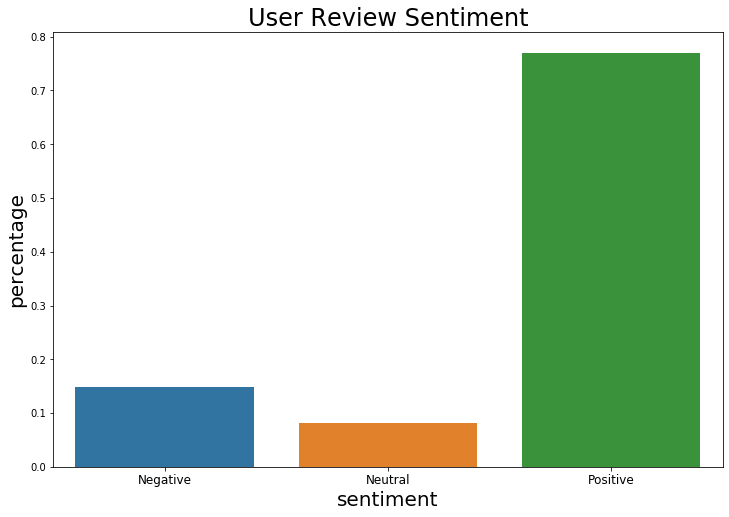

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(df.sent_class.value_counts(normalize=True).index, 
            df.sent_class.value_counts(normalize=True).values)
plt.xlabel('sentiment', fontsize=20)
plt.ylabel('percentage', fontsize=20)
plt.title('User Review Sentiment', fontsize=24)
plt.xticks(ticks = [0, 1, 2], labels = ['Negative', 'Neutral', 'Positive'], fontsize=12)


In [ ]:
df.genre.value_counts()

In [27]:
top = ['Rock', 'Indie', 'Rap', 'Pop', 'Electronic']

In [28]:
df_top = df.loc[df['genre'].isin(top)]

In [29]:
df_top

title       artist  \
3797   None of Us Are Getting out of This Life Alive  The Streets   
3798                                   Feel Feelings         Soko   
3799                   1000 gecs & the Tree of Clues     100 gecs   
3800                   1000 gecs & the Tree of Clues     100 gecs   
3801                   1000 gecs & the Tree of Clues     100 gecs   
...                                              ...          ...   
83819                                             13         Blur   
83820                                             13         Blur   
83821                                             13         Blur   
83822                                             13         Blur   
83823                            Central Reservation   Beth Orton   

               label release_date  metascore user_score       genre  \
3797          Island   2020-07-10       75.0        tbd  Electronic   
3798   Because Music   2020-07-10       70.0        tbd  Electronic   
3799        Big Beat   2020-07-10       81.0        7.8  Electronic   
3800        Big Beat   2020-07-10       81.0        7.8  Electronic   
3801        Big Beat   2020-07-10       81.0        7.8  Electronic   
...              ...          ...        ...        ...         ...   
83819    Food/Virgin   1999-03-23       79.0        8.7        Rock   
83820    Food/Virgin   1999-03-23       79.0        8.7        Rock   
83821    Food/Virgin   1999-03-23       79.0        8.7        Rock   
83822    Food/Virgin   1999-03-23       79.0        8.7        Rock   
83823         Arista   1999-03-09       84.0        8.4        Rock   

                                                 summary           name  \
3797   The first full-length release in nearly 10 yea...          Btsew   
3798   The third full-length release for the Los Ange...   reoffender59   
3799   The remix album from the experimental pop duo ...       ztuxilef   
3800   The remix album from the experimental pop duo ...         hazsch   
3801   The remix album from the experimental pop duo ...   sammyanthony   
...                                                  ...            ...   
83819  Damon Albarn's breakup album (he split with hi...  Dan_Abnormal_   
83820  Damon Albarn's breakup album (he split with hi...           MCRR   
83821  Damon Albarn's breakup album (he split with hi...        rextree   
83822  Damon Albarn's breakup album (he split with hi...     MoonNGloom   
83823  This is the second album for the English singe...         RussL.   

            date  ...                                             review  \
3797  2020-07-18  ...  Posner's best work since A Grand Don't Come fo...   
3798  2020-07-12  ...  Great album! It’s great dream pop with a stron...   
3799  2020-07-15  ...  Hey lil piss baby you think youre so **** cool...   
3800  2020-07-19  ...  Hold on, this isn't Gex!\r gec gec gec gec gec...   
3801  2020-07-12  ...  gecgecgecgecgecgecgecgecgecgecgecgecgecgecgecg...   
...          ...  ...                                                ...   
83819 2013-09-08  ...  Is a surprise by Blur, they had another change...   
83820 2015-01-25  ...  Blur and Albarn's resume' consists of quality ...   
83821 2019-02-19  ...  A beautiful, underrated masterpiece. This is w...   
83822 2019-03-27  ...  A beautiful, heartbreaking, strange, yet ever ...   
83823 2006-08-15  ...   My alltime favorite cd! Very unique sound, co...   

                                            clean_review length  word_count  \
3797   posners best work since grand dont come free q...    200          34   
3798   great great dream pop strong character also fl...     94          17   
3799   hey lil piss baby think youre cool huh think t...    328          67   
3800   hold isnt gex gec gec gec gec gec gec gec gec ...     73          17   
3801   gecgecgecgecgecgecgecgecgecgecgecgecgecgecgecg...    300           1   
...                                                  ...    ...         ...  

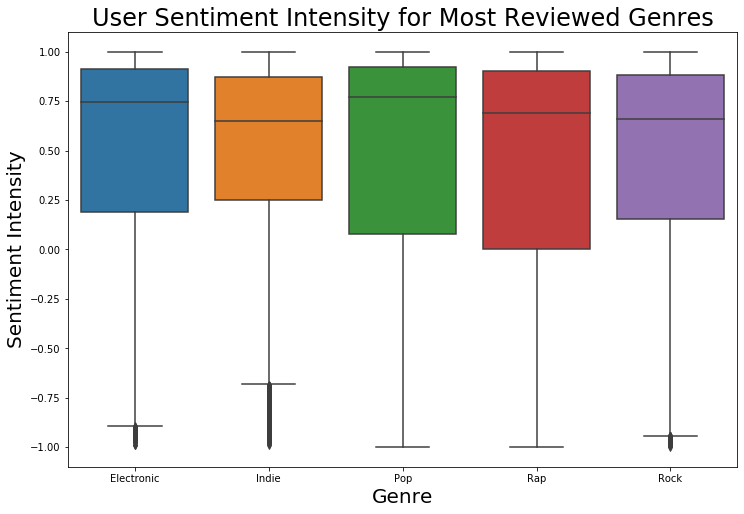

In [92]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'genre', y = 'sentiment', data = df_top)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Sentiment Intensity', fontsize=20)
plt.title('User Sentiment Intensity for Most Reviewed Genres', fontsize=24)



In [ ]:
df.rating.describe()

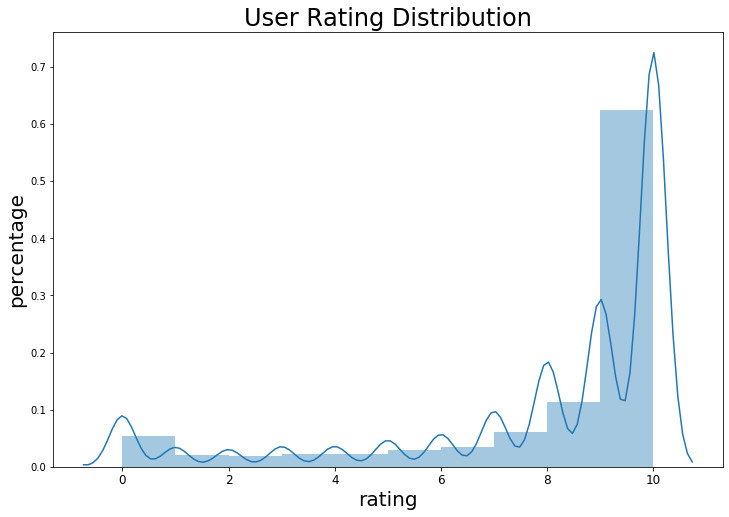

In [77]:
plt.figure(figsize=(12,8))
sns.distplot(df.rating, bins=10)
plt.xlabel('rating', fontsize=20)
plt.ylabel('percentage', fontsize=20)
plt.title('User Rating Distribution', fontsize=24)
plt.xticks(fontsize=12)


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 7 Text xticklabel objects>)

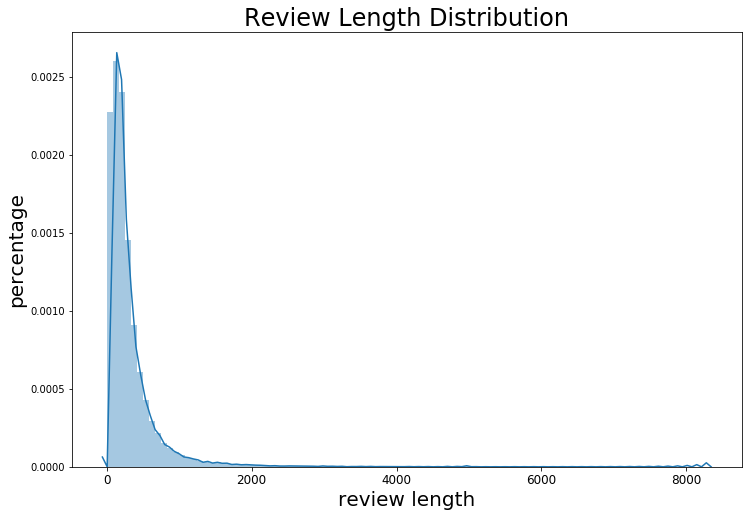

In [32]:
plt.figure(figsize=(12,8))
sns.distplot(df.length, bins=100)
plt.xlabel('review length', fontsize=20)
plt.ylabel('percentage', fontsize=20)
plt.title('Review Length Distribution', fontsize=24)
plt.xticks(fontsize=12)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 <a list of 11 Text xticklabel objects>)

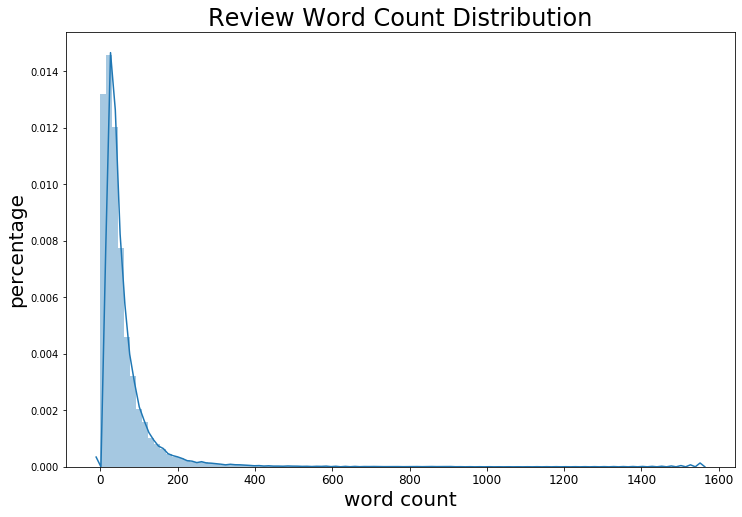

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(df.word_count, bins=100)
plt.xlabel('word count', fontsize=20)
plt.ylabel('percentage', fontsize=20)
plt.title('Review Word Count Distribution', fontsize=24)
plt.xticks(fontsize=12)

In [38]:
tokenized_review = tokenizer.tokenize(df['clean_review'].sum())

In [ ]:
rev_words = FreqDist(tokenized_review)

In [ ]:
plt.figure(figsize=(16,10))
rev_words.plot(40)

### 3.3 Bigrams and Trigrams for each class

In [34]:
from sklearn.feature_extraction.text import CountVectorizer  #function to get the top text n_grams
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g), stop_words=stopwords_list).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

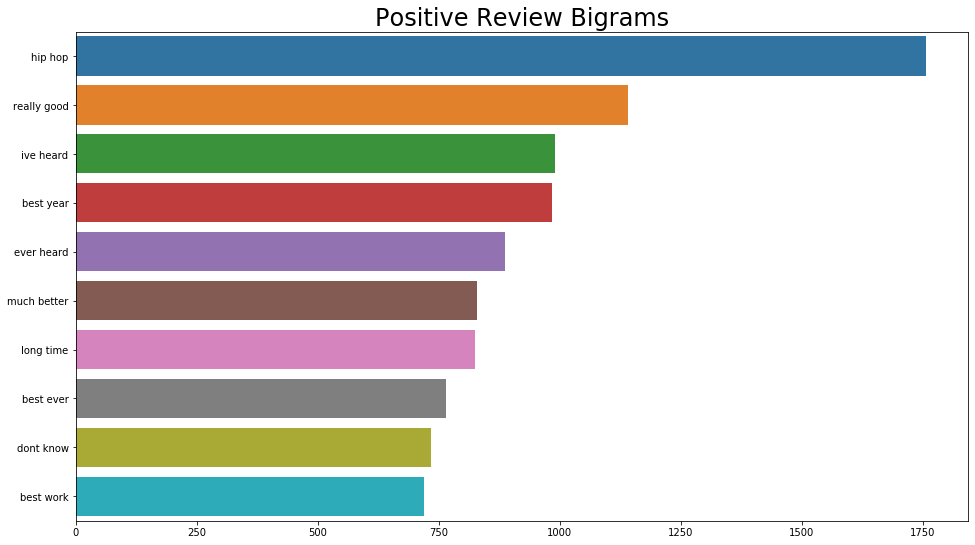

In [35]:
plt.figure(figsize = (16, 9))
top_bigrams = get_top_text_ngrams(df[df.sent_class == 1].clean_review, 10, 2)
top_bigrams = dict(top_bigrams)
sns.barplot(x = list(top_bigrams.values()), y = list(top_bigrams.keys()))
plt.title('Positive Review Bigrams', fontsize=24)


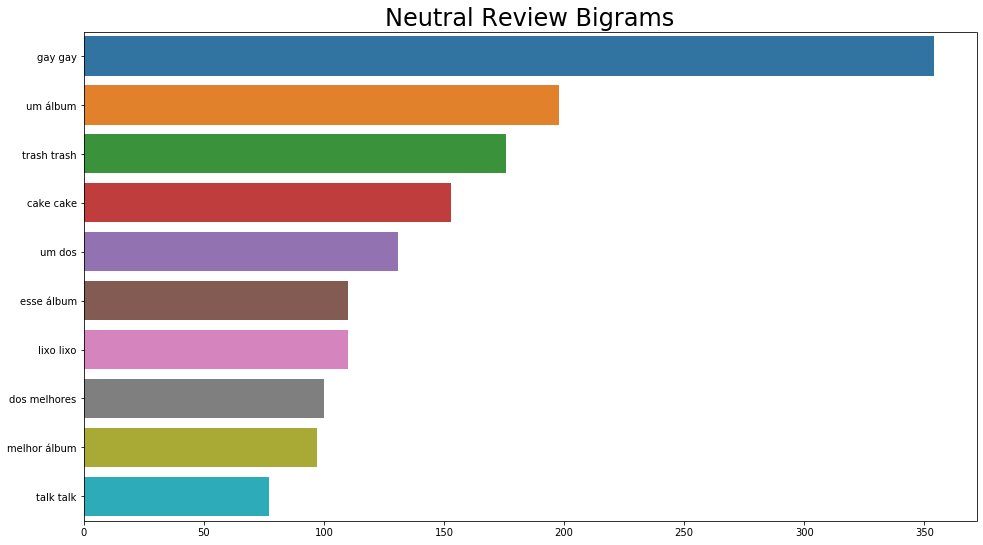

In [36]:
plt.figure(figsize = (16, 9))
top_bigrams = get_top_text_ngrams(df[df.sent_class == 0].clean_review, 10, 2)
top_bigrams = dict(top_bigrams)
sns.barplot(x = list(top_bigrams.values()), y = list(top_bigrams.keys()))
plt.title('Neutral Review Bigrams', fontsize=24)


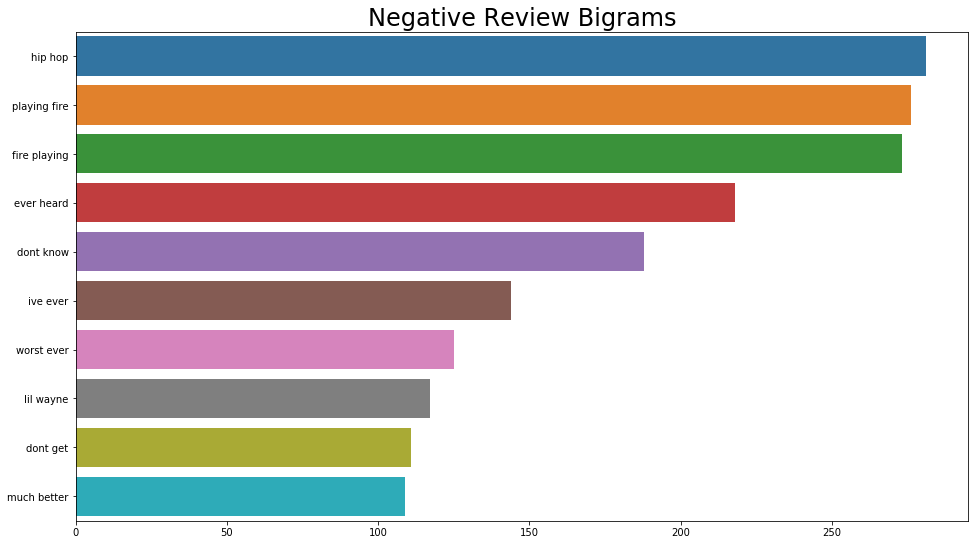

In [37]:
plt.figure(figsize = (16, 9))
top_bigrams = get_top_text_ngrams(df[df.sent_class == -1].clean_review, 10, 2)
top_bigrams = dict(top_bigrams)
sns.barplot(x = list(top_bigrams.values()), y = list(top_bigrams.keys()))
plt.title('Negative Review Bigrams', fontsize=24)


Trigrams

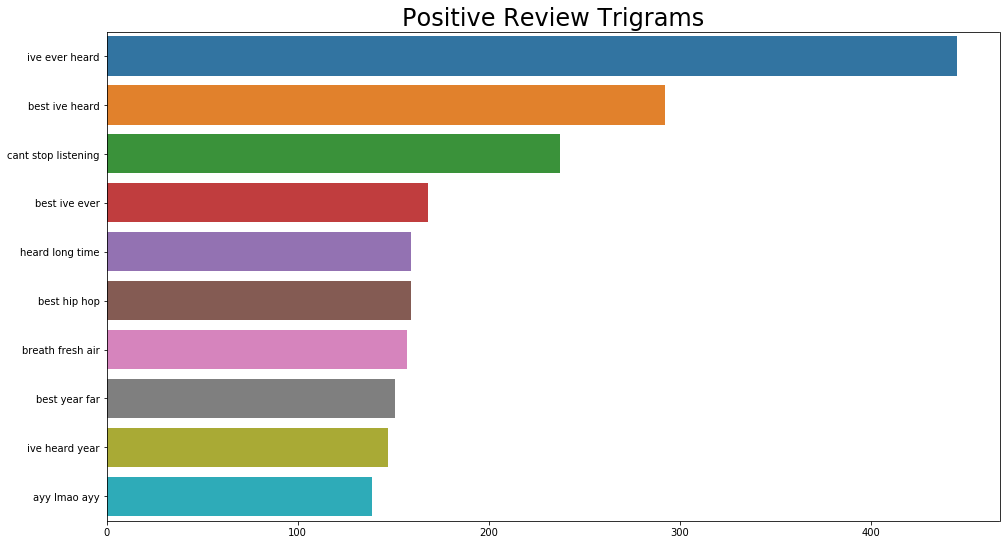

In [38]:
plt.figure(figsize = (16, 9))
top_trigrams = get_top_text_ngrams(df[df.sent_class == 1].clean_review, 10, 3)
top_trigrams = dict(top_trigrams)
sns.barplot(x = list(top_trigrams.values()), y = list(top_trigrams.keys()))
plt.title('Positive Review Trigrams', fontsize=24)


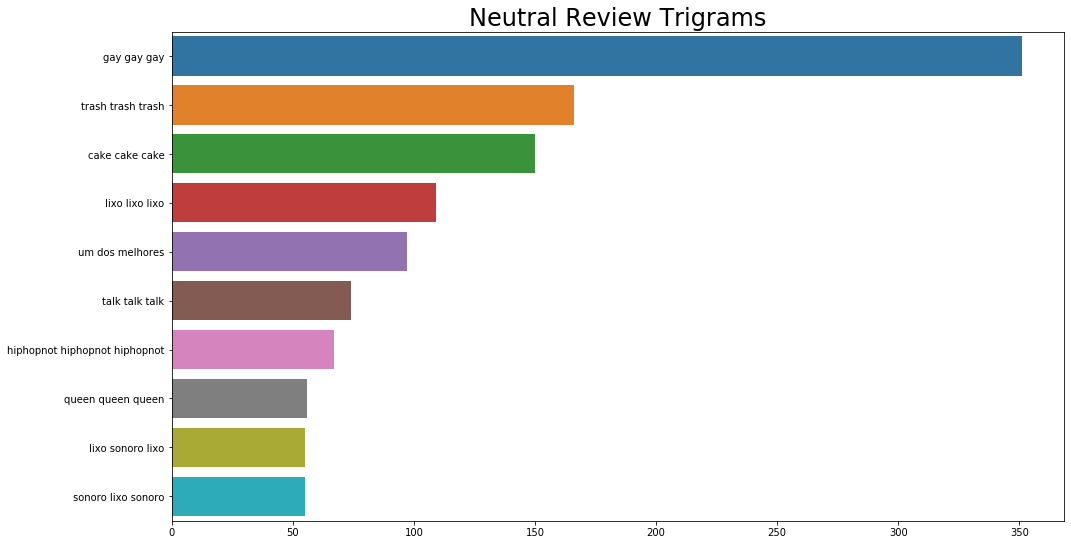

In [39]:
plt.figure(figsize = (16, 9))
top_trigrams = get_top_text_ngrams(df[df.sent_class == 0].clean_review, 10, 3)
top_trigrams = dict(top_trigrams)
sns.barplot(x = list(top_trigrams.values()), y = list(top_trigrams.keys()))
plt.title('Neutral Review Trigrams', fontsize=24)


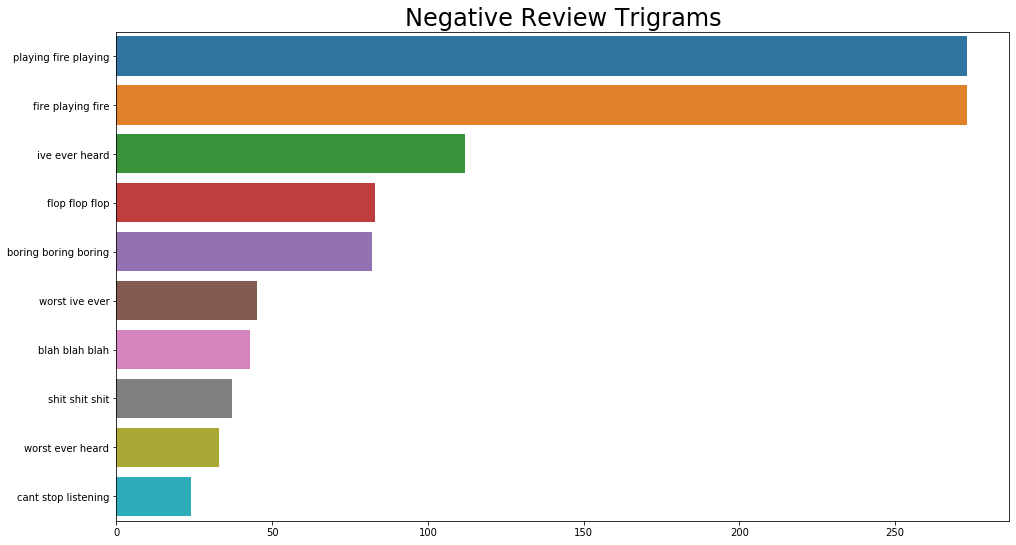

In [40]:
plt.figure(figsize = (16, 9))
top_bigrams = get_top_text_ngrams(df[df.sent_class == -1].clean_review, 10, 3)
top_bigrams = dict(top_bigrams)
sns.barplot(x = list(top_bigrams.values()), y = list(top_bigrams.keys()))
plt.title('Negative Review Trigrams', fontsize=24)


### 3.4 Word Cloud for each class

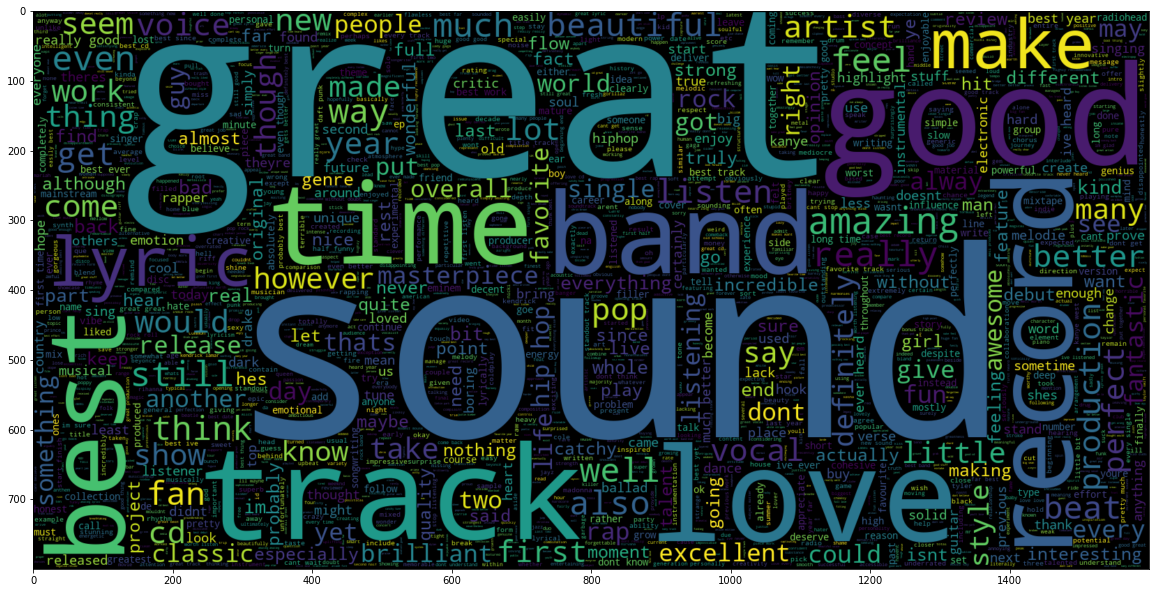

In [5]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df[df.sent_class == 1].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85500 entries, 0 to 85499
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    85498 non-null  object 
 1   title         84501 non-null  object 
 2   artist        84502 non-null  object 
 3   label         84126 non-null  object 
 4   release_date  84502 non-null  object 
 5   metascore     84502 non-null  float64
 6   user_score    84502 non-null  object 
 7   genre         84502 non-null  object 
 8   summary       83190 non-null  object 
 9   name          84502 non-null  object 
 10  date          84500 non-null  object 
 11  rating        84054 non-null  float64
 12  review        84037 non-null  object 
 13  clean_review  83415 non-null  object 
 14  length        83606 non-null  float64
 15  word_count    83606 non-null  float64
 16  sentiment     83606 non-null  float64
 17  negative      83606 non-null  float64
 18  neutral       83606 non-nu

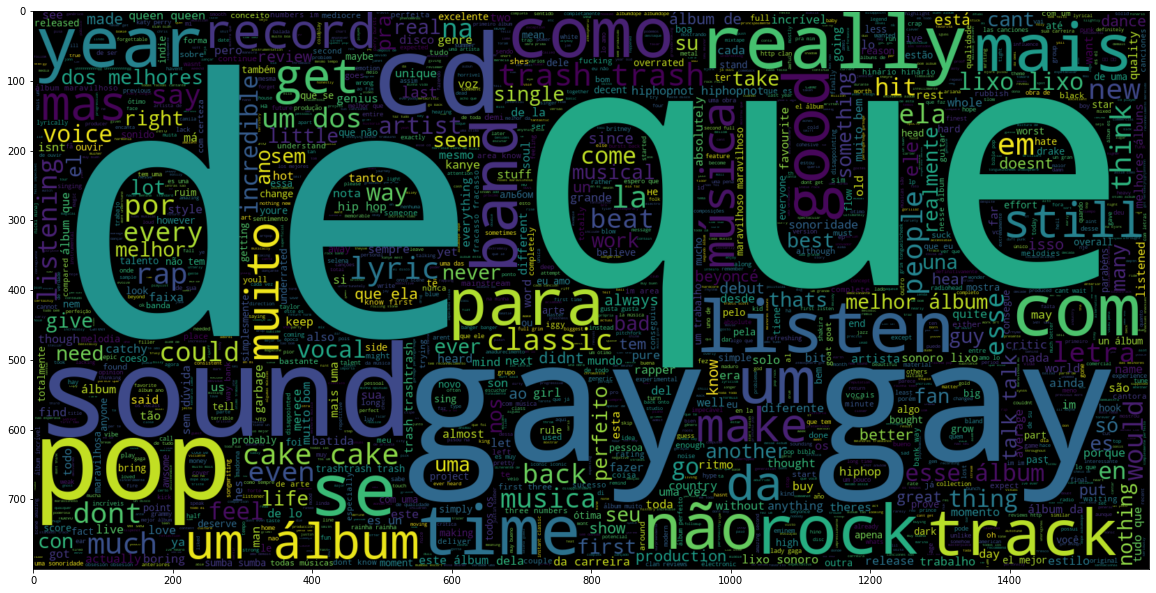

In [11]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df[df.sent_class == 0].clean_review))
plt.imshow(wc , interpolation = 'bilinear')

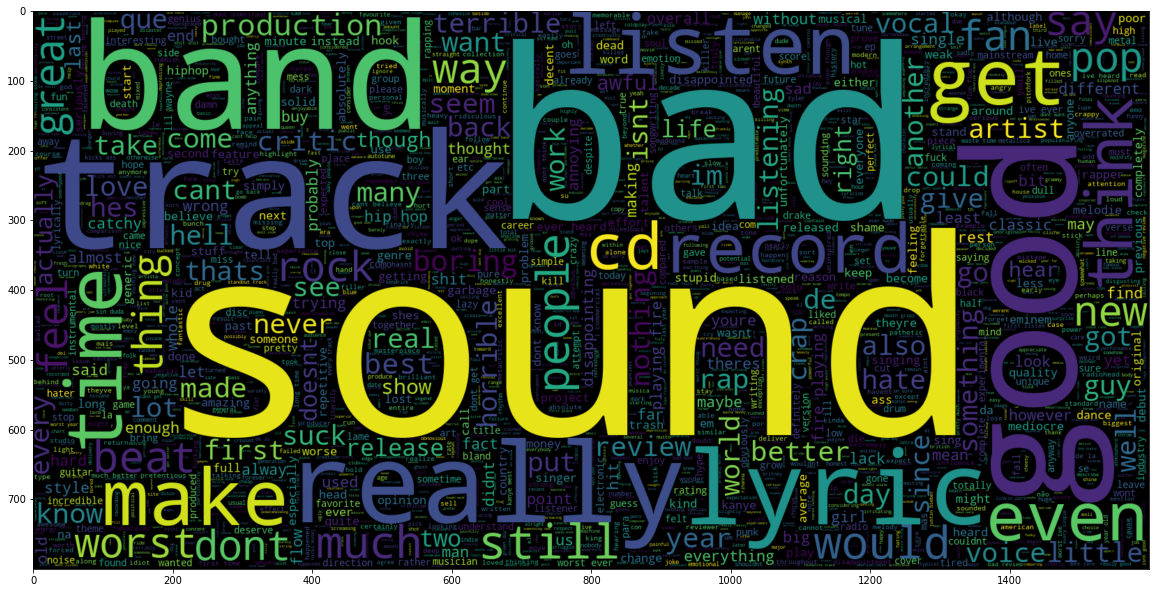

In [12]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df[df.sent_class == -1].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


### 3.5 Word Clouds for Rock and Rap

These two generes were chosen specifically as they are have the top 3 most reviews and greater differences in musicial style compared to Rock vs Indie

Rock

In [13]:
df_rock = df.loc[df.genre == 'Rock']

/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


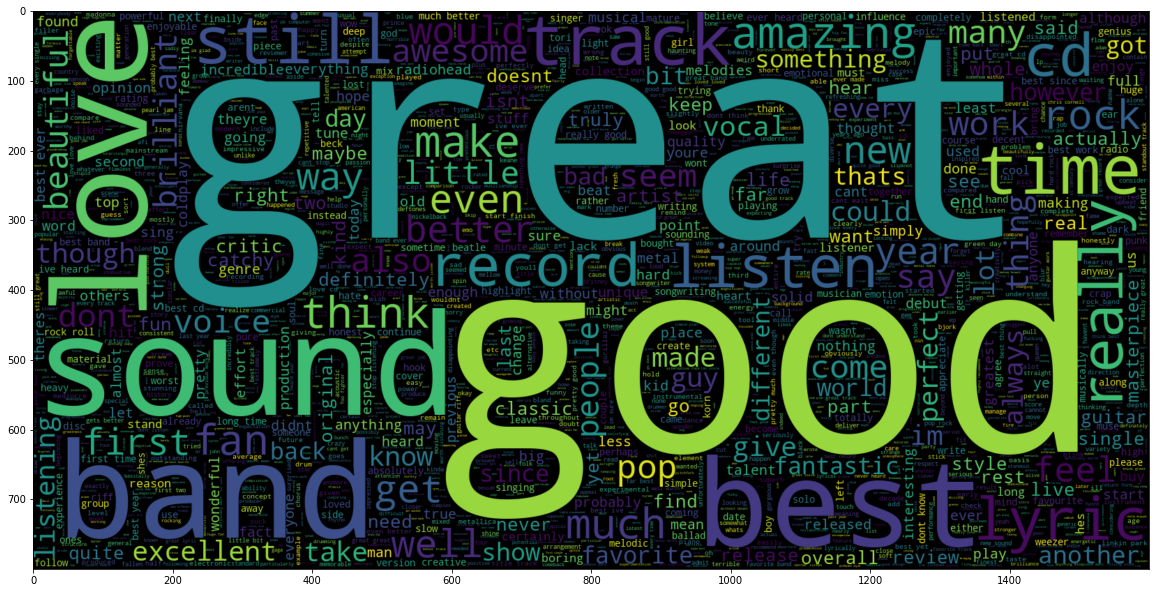

In [14]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df_rock[df.sent_class == 1].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


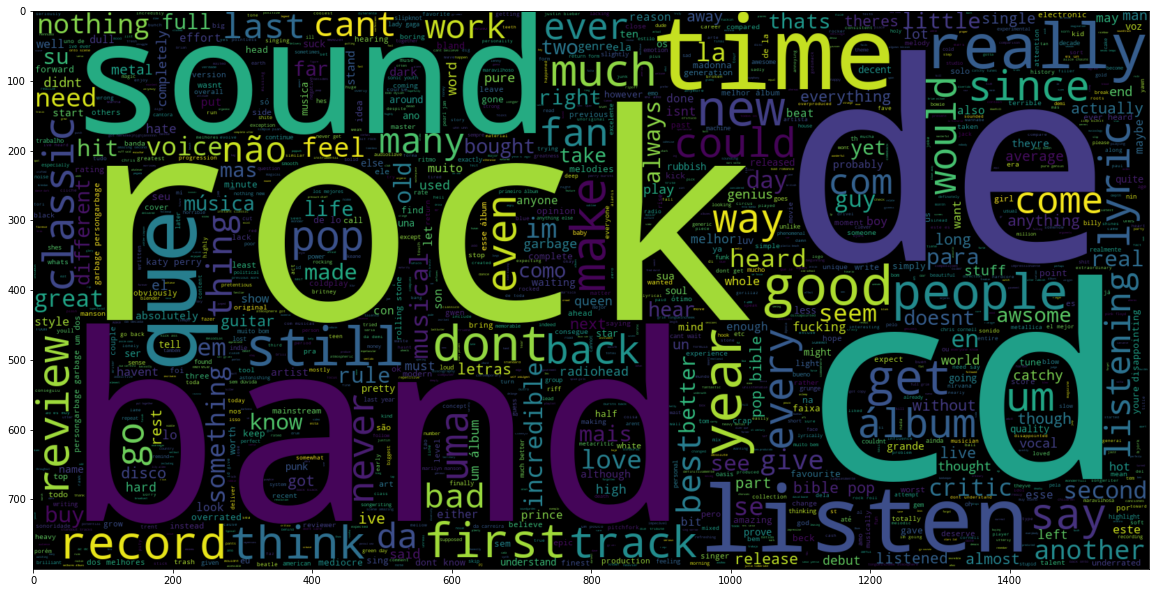

In [15]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df_rock[df.sent_class == 0].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


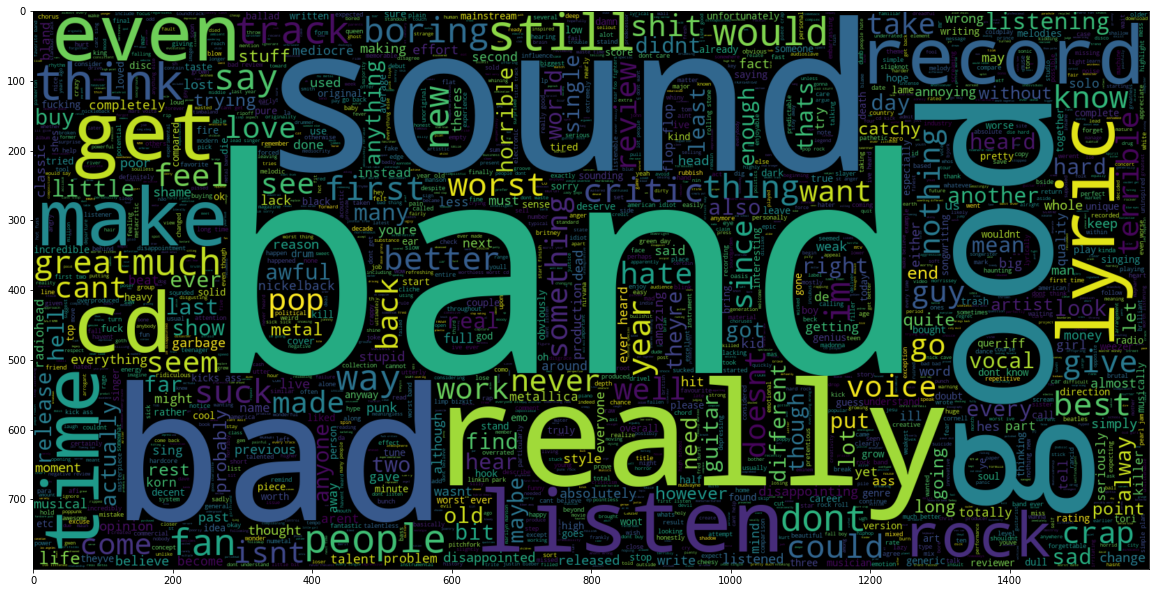

In [16]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df_rock[df.sent_class == -1].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


Rap

In [17]:
df_rap = df.loc[df.genre == 'Rap']

/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


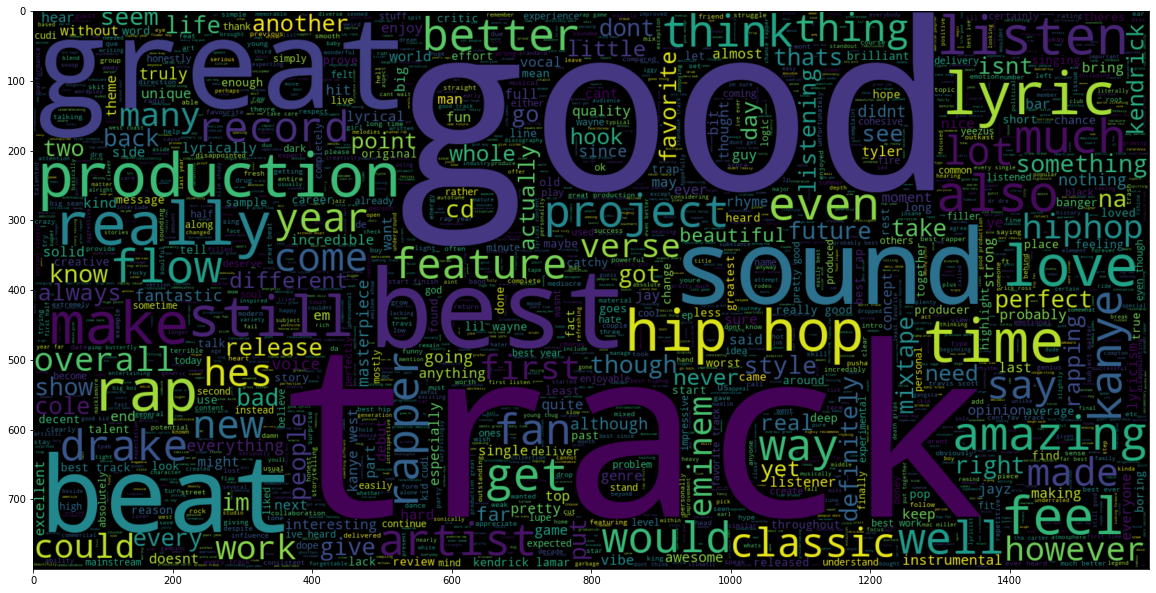

In [18]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df_rap[df.sent_class == 1].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


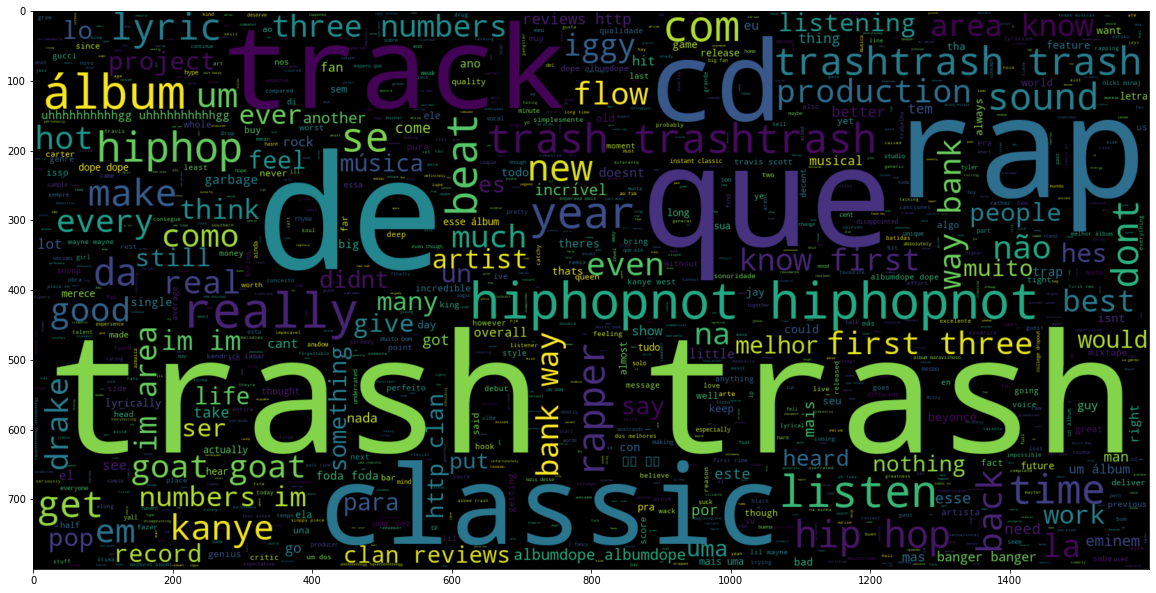

In [19]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df_rap[df.sent_class == 0].clean_review))
plt.imshow(wc , interpolation = 'bilinear')


/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


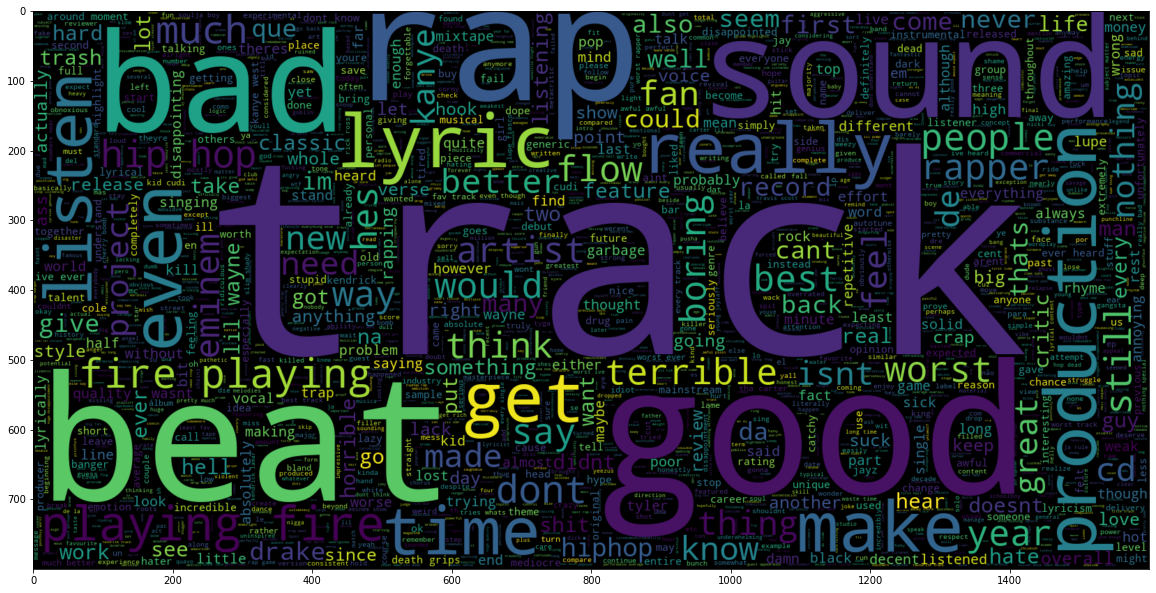

In [20]:
plt.figure(figsize = (20,20)) # Text that is True
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords_list).generate(" ".join(df_rap[df.sent_class == -1].clean_review))
plt.imshow(wc , interpolation = 'bilinear')
